In [1]:
import tarfile
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import av
import sys
import cv2
from cv2 import cvtColor
from PIL import Image



def video_load(path):
	v = av.open(path)

	imgs = []

	for packet in v.demux():
		for frame in packet.decode():
			#if frame.type == 'video':
			img = frame.to_image()  # PIL/Pillow image
			arr = np.asarray(img)  # numpy array
			imgs.append(arr)

	return imgs

def video_showFrame(img):
	plt.imshow(img)
	plt.axis('off')
	plt.show()
    

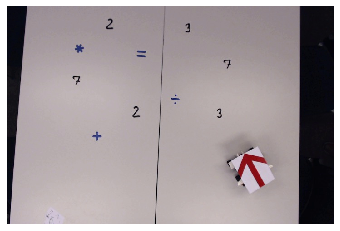

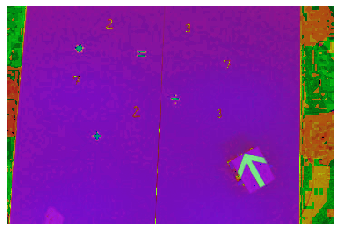

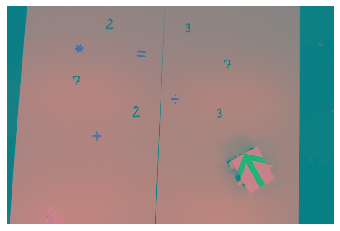

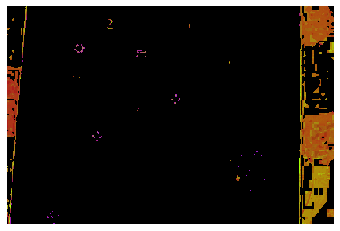

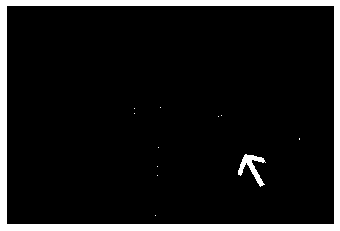

In [2]:
video = video_load("../data/robot_parcours_1.avi");

#print(video[1]);

img_hsv=cv2.cvtColor(video[1], cv2.COLOR_BGR2HSV);
img_yuv = cv2.cvtColor(video[1], cv2.COLOR_BGR2YUV);

video_showFrame(video[1])
video_showFrame(img_hsv)
video_showFrame(img_yuv)

"""
# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)
"""
lower = np.array([155,25,0])
upper = np.array([179,255,255])
mask_hsv_1 = cv2.inRange(img_hsv, lower, upper)

mask_hsv = mask_hsv_1
output_hsv = img_hsv.copy()
output_hsv[np.where(mask_hsv==0)] = 0

lower_rgb = np.array([50,0,0])
upper_rgb = np.array([255,50,50])
mask_rgb = cv2.inRange(video[1], lower_rgb, upper_rgb)
output_rgb = video[1].copy()
output_rgb[np.where(mask_rgb==0)] = 0
output_rgb[np.where(mask_rgb!=0)] = [255,255,255]

video_showFrame(output_hsv)
video_showFrame(output_rgb)

(480, 720)
112


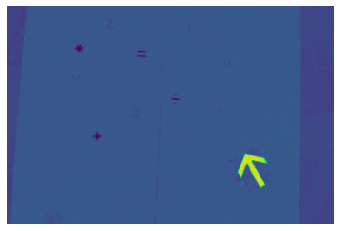

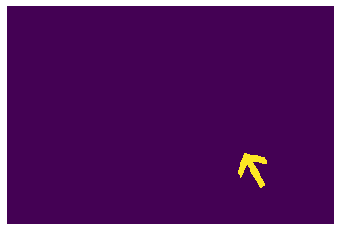

In [3]:
#TEST YUV

from skimage import data, io
import matplotlib.pyplot as plt

video = video_load("../data/robot_parcours_1.avi");

#print(video[1]);

img_rgb = video[1];
img_hsv=cv2.cvtColor(video[1], cv2.COLOR_BGR2HSV);
img_yuv = cv2.cvtColor(video[1], cv2.COLOR_BGR2YUV);

img_yuv = img_yuv[:,:,1];

img_bin = np.zeros([480,720]);
img_bin[np.where(img_yuv>140)] = 1

print(img_yuv.shape)
smallest = img_yuv.min(axis=0).min(axis=0)
print(smallest)

#print(img_yuv)
video_showFrame(img_yuv)

video_showFrame(img_bin)

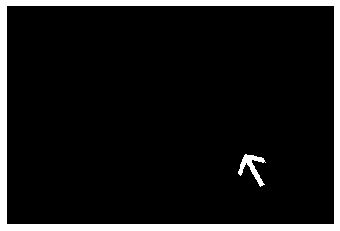

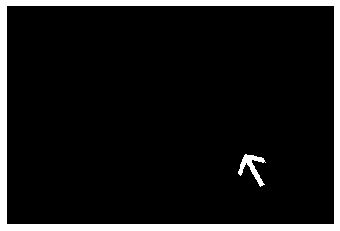

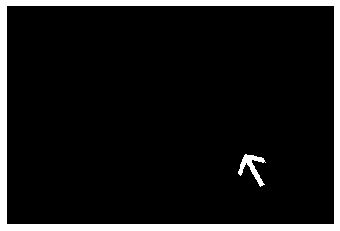

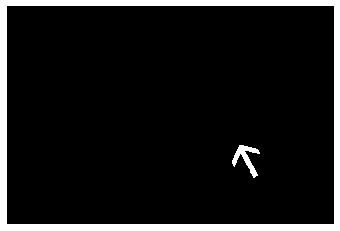

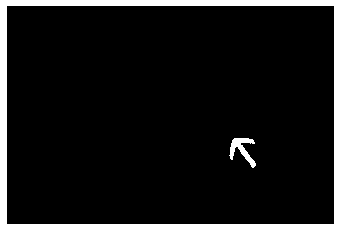

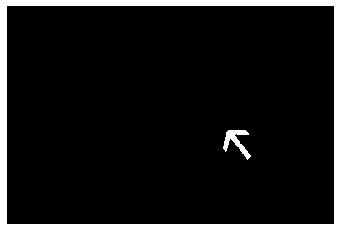

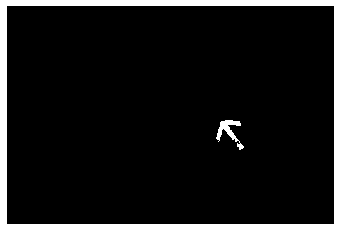

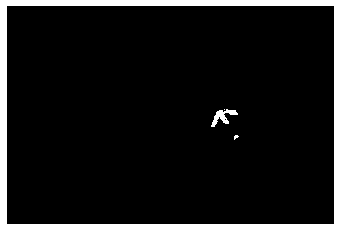

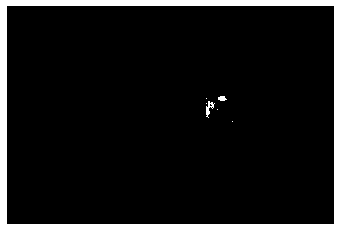

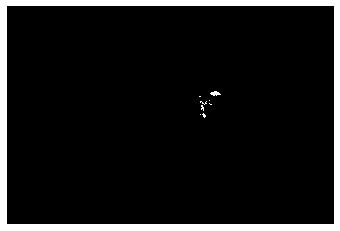

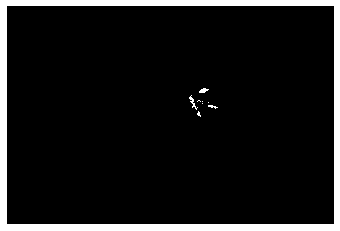

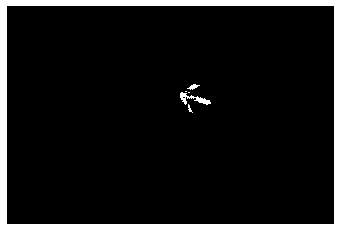

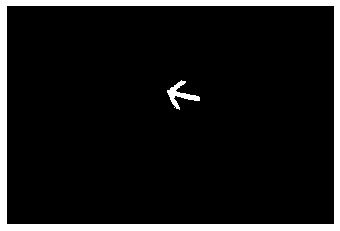

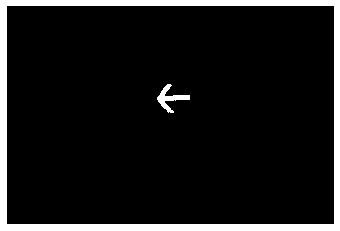

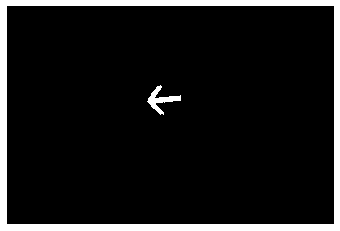

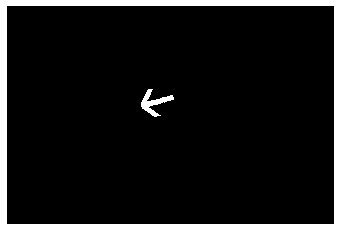

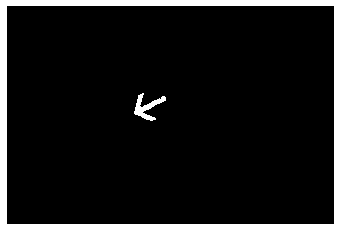

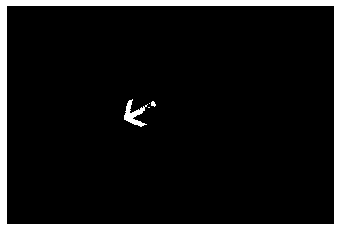

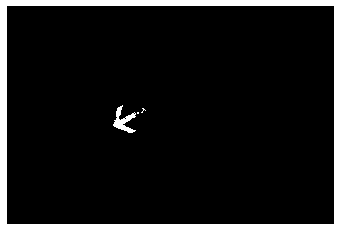

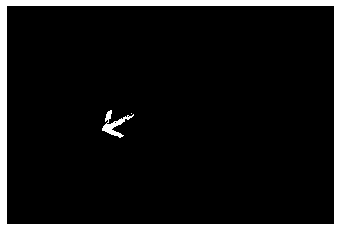

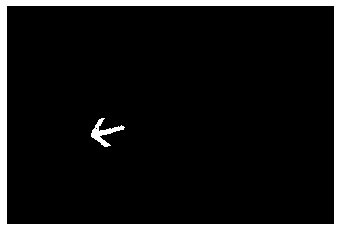

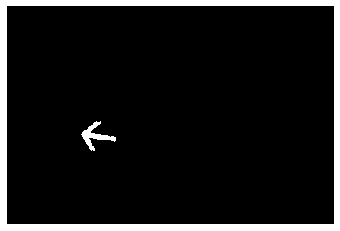

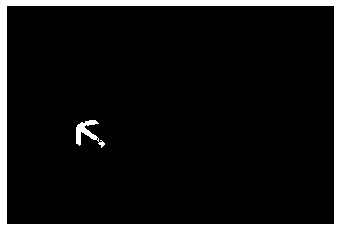

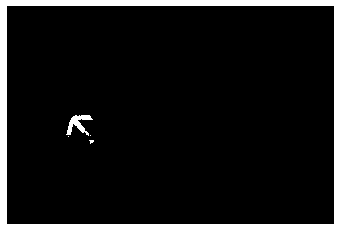

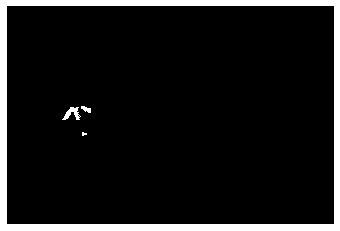

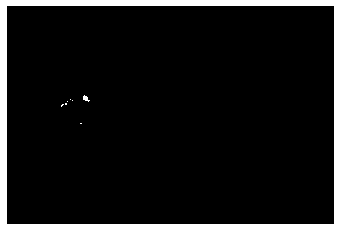

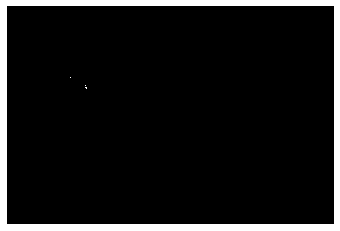

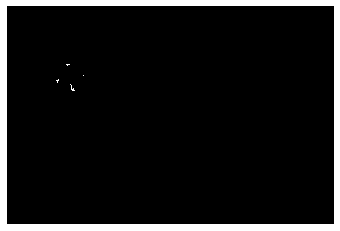

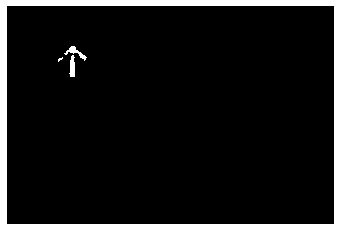

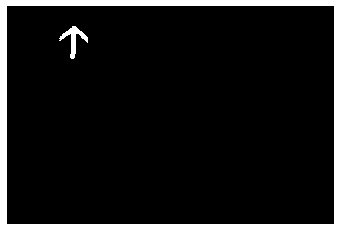

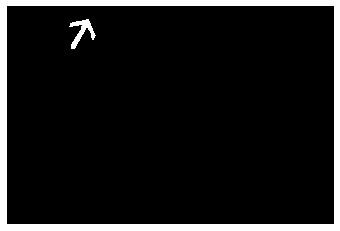

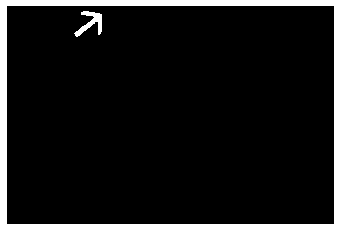

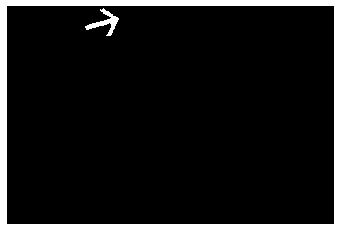

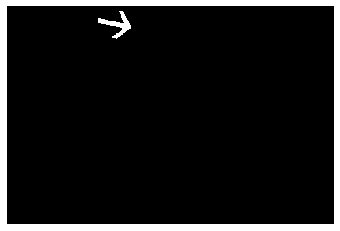

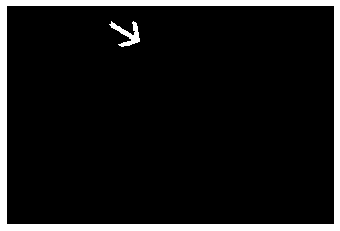

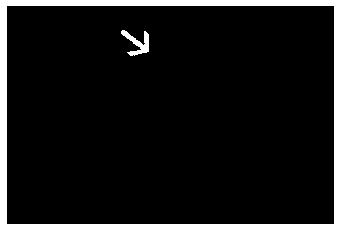

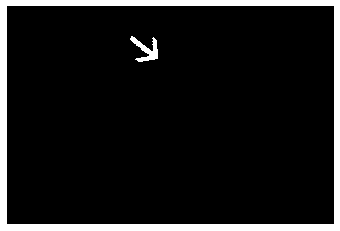

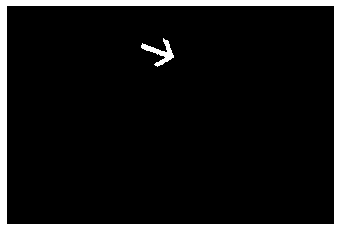

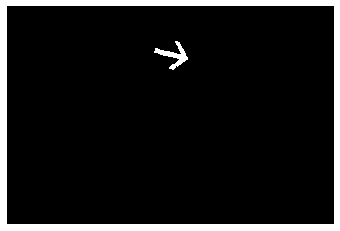

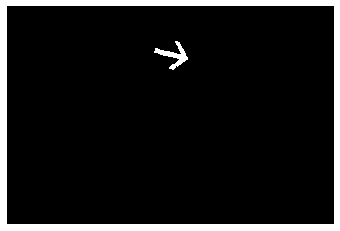

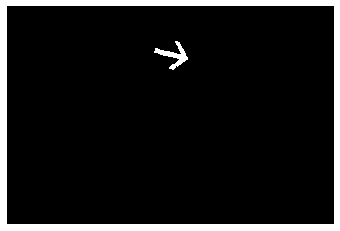

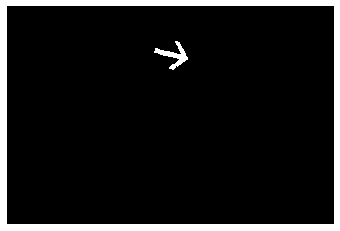

In [4]:
#FOR BOUCLE RGB

for im in video:
    lower_rgb = np.array([100,0,0])
    upper_rgb = np.array([255,50,50])
    mask_rgb = cv2.inRange(im, lower_rgb, upper_rgb)
    output_rgb = im.copy()
    output_rgb[np.where(mask_rgb==0)] = 0
    output_rgb[np.where(mask_rgb!=0)] = [255,255,255]
    video_showFrame(output_rgb)

In [5]:
#FOR BOUClE POUR YUV
from skimage.filters import threshold_otsu

arrow_pos=np.zeros([42,2])
i = 0
thr_min_2 = 0;
thr_min_1 = 0;
for im in video:
    #ranges of y, u, v (theoretically):
    # Y: 0 - 255
    # U: -128 - 127
    # V: -128 - 127
    img_yuv = cvtColor(im, cv2.COLOR_BGR2YUV);
    img_yuv = img_yuv[:,:,1];
    img_bin = np.zeros([480,720]);
    if i==0:
        thr_min_2 = thr_min_1 = thresh = threshold_otsu(img_yuv);
    else:
        thr_min_2 = thr_min_1;
        thr_min_1 = thresh;
        thr_mean = np.mean([thr_min_2, thr_min_1]);
        thresh = threshold_otsu(img_yuv);
        if abs(thresh-thr_mean)>5: #5 = empirically chosen threshold
            thresh = thr_mean;
            
    print(thr_min_2, thr_min_1, thresh)
    img_bin[np.where(img_yuv>thresh)] = 1
    #video_showFrame(img_bin)
    M = cv2.moments(img_bin);
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    arrow_pos[i,:] = [cX,cY];
    i = i+1

#print(arrow_pos)    
'''
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.set_xlim(0,720)
ax.set_ylim(480,0)

plt.plot(arrow_pos[:,0], arrow_pos[:,1])

plt.show()
'''

153 153 153
153 153 153
153 153 153
153 153 153
153 153 152
153 152 152
152 152 151
152 151 150
151 150 148
150 148 148
148 148 149
148 149 149
149 149 150
149 150 151
150 151 151
151 151 151
151 151 151
151 151 151
151 151 151
151 151 151
151 151 152
151 152 152
152 152 152
152 152 152
152 152 150
152 150 148
150 148 146
148 146 147
146 147 149
147 149 150
149 150 150
150 150 149
150 149 149
149 149 150
149 150 150
150 150 150
150 150 150
150 150 150
150 150 150
150 150 150
150 150 150
150 150 150


'\nfig, ax = plt.subplots(1, 1, figsize=(12, 12))\nax.set_xlim(0,720)\nax.set_ylim(480,0)\n\nplt.plot(arrow_pos[:,0], arrow_pos[:,1])\n\nplt.show()\n'